In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import uproot as up
import numpy as np

Text(0, 0.5, 'Rayleigh Scattering Length / cm')

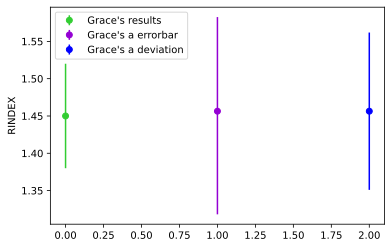

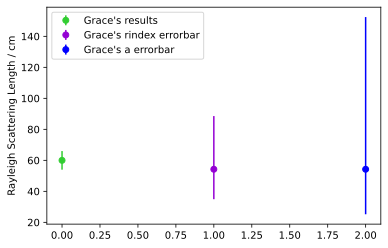

In [2]:
# Grace 2017
fig1 = plt.figure(1)
plt.errorbar([0], [1.45], yerr=[[0.07], [0.07]], fmt="o", color='limegreen', label="Grace's results")
plt.errorbar([1], [ 1.45641], yerr=[[1.45641-1.31816], [1.58262-1.45641]],
    fmt="o", color='darkviolet', label="Grace's a errorbar")
plt.errorbar([2], [1.45641], yerr=[[0.105462],[0.105462]], fmt="o", color='blue', label="Grace's a deviation")

plt.legend(loc='upper left')
plt.ylabel("RINDEX")



fig2 = plt.figure(2)
plt.errorbar([0], [60], yerr=[[6], [6]], fmt="o", color='limegreen', label="Grace's results")
plt.errorbar([1], [54.2612], yerr=[[54.2612-34.9314], [88.553-54.2612]],
    fmt="o", color='darkviolet', label="Grace's rindex errorbar")
plt.errorbar([2], [54.2612], yerr=[[54.2612-25.2117], [152.428-54.2612]],
    fmt="o", color='blue', label="Grace's a errorbar")


plt.legend(loc='upper left')
plt.ylabel("Rayleigh Scattering Length / cm")

Text(0, 0.5, 'rindex')

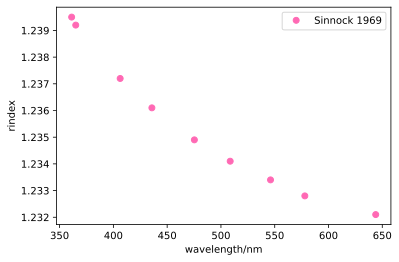

In [3]:
# data used by Grace's fitting (LAr 83.81K)
wavelength = [361.2, 365, 406.3, 435.8, 475.3, 508.6, 546.1, 578, 643.9]
rindex = [1.2395, 1.2392, 1.2372, 1.2361, 1.2349, 1.2341, 1.2334, 1.2328, 1.2321]
plt.plot(wavelength, rindex, "o", color='hotpink', label="Sinnock 1969")
plt.legend()
plt.xlabel("wavelength/nm")
plt.ylabel("rindex")


Text(0, 0.5, 'rindex')

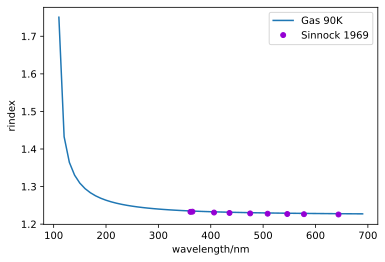

In [4]:
# Compare rindex formula between Zhou and Grace:
import numpy as np

def sellmeier_func(x):
    f1 = 0.2075
    f2 = 0.0415
    f3 = 4.3330
    l1 = 91.012
    l2 = 87.892
    l3 = 214.02
    rhol = 34.49
    rhog = 44.66E-3

    return np.sqrt(3/(1-1.2055E-2*2/3*(rhol/rhog)*( f1/(l1-1/x/x) + f2/(l2-1/x/x) + f3/(l3-1/x/x) ) ) -2)

def my_func(x):
    a0 = 1.24526
    aUV = 2.65822e-01
    aIR = 6.01569e-04
    lUV = 106.6
    lIR = 908.3

    return np.sqrt(a0+aUV*x**2/(x**2-lUV**2)+aIR*x**2/(x**2-lIR**2))   

def grace_func(x):
    a0 = 1.24
    aUV = 0.27
    aIR = 0.00047
    lUV = 106.6
    lIR = 908.3

    return np.sqrt(a0+aUV*x**2/(x**2-lUV**2)+aIR*x**2/(x**2-lIR**2))

wavelength1 = [361.2, 365, 406.3, 435.8, 475.3, 508.6, 546.1, 578, 643.9]
rindex1 = [1.2326, 1.2331, 1.2308, 1.2297, 1.2285,  1.2277, 1.2269, 1.2264, 1.2256]

wl_arr = np.arange(110, 700, 10)
sel_arr = []
gra_arr = []
my_arr  = []
for elem in wl_arr:
    sel_arr.append(sellmeier_func(elem/1000.) )
    gra_arr.append(grace_func(elem) )
    my_arr.append(my_func(elem))

#plt.figure(1)
#plt.errorbar([1, 2, 3], [1.24526, 2.65822e-01, 6.01569e-04], yerr=[5.01570e-01, 4.58267e-01, 4.16347e-02], fmt="o", label="My fitting")
#plt.errorbar([1, 2, 3], [1.24, 0.27, 0.00047], yerr=[0.09, 0.09, 0.007], fmt="o", label="Grace's fitting")
#plt.show()

#plt.figure(2)
plt.plot(wl_arr, sel_arr, label="Gas 90K")
#plt.plot(wl_arr, gra_arr, label="Grace 2017")
#plt.plot(wl_arr, my_arr, label="My fitting based on Grace's work")

plt.plot(wavelength1, rindex1, "o", ms=5, color='darkviolet', label="Sinnock 1969")

plt.legend()
plt.xlabel("wavelength/nm")
plt.ylabel("rindex")

#plt.savefig('gas_data.png')

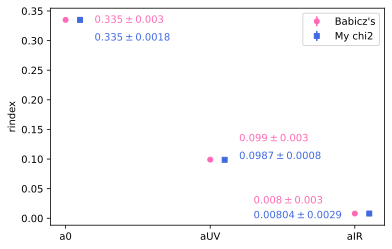

In [5]:
# chi2 fitting parameters comparison with Babicz's model
plt.errorbar([1,2,3], [0.335, 0.099, 0.008], yerr=[0.003, 0.003, 0.003], 
              fmt="o", ms=5, color='hotpink', label="Babicz's")
plt.errorbar([1.1,2.1,3.1], [0.335, 0.0987, 0.00804], yerr=[1.8e-03, 8.0e-04, 2.90e-03], 
              fmt='s', ms=5, color='royalblue',label='My chi2')

plt.text(1.2, 0.33, r'$0.335 \pm 0.003$', color='hotpink')
plt.text(1.2, 0.30, r'$0.335\pm0.0018$', color='royalblue')
plt.text(2.2, 0.13, r'$0.099 \pm 0.003$', color='hotpink')
plt.text(2.2, 0.10, r'$0.0987\pm0.0008$', color='royalblue')
plt.text(2.3, 0.025, r'$0.008 \pm 0.003$', color='hotpink')
plt.text(2.3, 0.00, r'$0.00804 \pm 0.0029$', color='royalblue')

plt.legend()
plt.ylabel("rindex")
plt.xticks(np.arange(1, 4, 1), ('a0', 'aUV', 'aIR'))
plt.savefig('parameterBabizc.pdf')

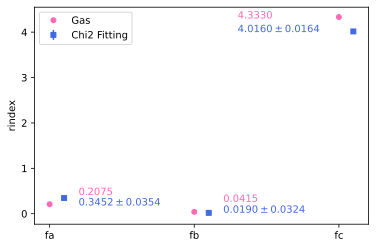

In [12]:
# chi2 fitting parameters comparison (Zhou's model)
plt.errorbar([1,2,3], [0.2075, 0.0415, 4.333], 
              fmt="o", ms=5, color='hotpink', label="Gas")
#plt.errorbar([1.1,2.1,3.1], [2.07314e-01, 7.42597e-02, 4.21482e+00], yerr=[5.03606e-02, 4.95358e-02, 1.20956e-01], 
#              fmt='s', ms=5, color='royalblue',label='Chi2 Fitting')

plt.errorbar([1.1,2.1,3.1], [0.3452, 0.0190, 4.0160], yerr=[3.53587e-02, 3.24374e-02, 1.63766e-02],
             fmt='s', ms=5, color='royalblue', label='Chi2 Fitting')

plt.text(1.2, 0.41, r'$0.2075$', color='hotpink')
#plt.text(1.2, 0.18, r'$0.207\pm0.050$', color='royalblue')
plt.text(1.2, 0.18, r'$0.3452\pm0.0354$', color='royalblue')
plt.text(2.2, 0.26, r'$0.0415$', color='hotpink')
#plt.text(2.2, 0.02, r'$0.0742\pm 0.0495$', color='royalblue')
plt.text(2.2, 0.02, r'$0.0190\pm0.0324$', color='royalblue')
plt.text(2.3, 4.3, r'$4.3330$', color='hotpink')
#plt.text(2.3, 4.0, r'$4.2148\pm0.1210$', color='royalblue')
plt.text(2.3, 4.0, r'$4.0160\pm0.0164$', color='royalblue')

plt.legend()
plt.ylabel("rindex")
plt.xticks(np.arange(1, 4, 1), ('fa', 'fb', 'fc'))
plt.savefig('parameterZhouGV.pdf')

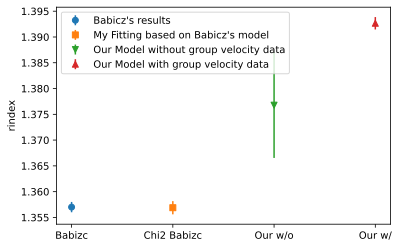

In [26]:
# compare rindex for different fittings:
plt.errorbar([1], [1.357], yerr=[0.001], fmt='o', label="Babicz's results")
plt.errorbar([2], [1.35688], yerr=[0.00127679],
             fmt='s', label="My Fitting based on Babicz's model")
plt.errorbar([3], [1.37677], yerr=[0.0102315],
             fmt='v', label="Our Model without group velocity data")

plt.errorbar([4], [1.39266], yerr=[0.00120502],
             fmt='^', label='Our Model with group velocity data')

plt.legend()
plt.ylabel("rindex")
plt.xticks(np.arange(1, 5, 1), ('Babizc', 'Chi2 Babizc', 'Our w/o', 'Our w/'))
plt.savefig('rindex128comp.pdf')

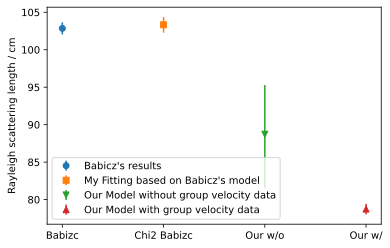

In [37]:
# Rayleigh scattering length:

plt.errorbar([1], [102.852], yerr=[[103.664-102.852], [102.852-102.048]], fmt='o', label="Babicz's results")
plt.errorbar([2], [103.332], yerr=[[104.376-103.332], [103.332-102.301]],
             fmt='s', label="My Fitting based on Babicz's model")
plt.errorbar([3], [88.7252], yerr=[[95.9394-88.7252], [88.7252-82.1775]],
             fmt='v', label="Our Model without group velocity data")

plt.errorbar([4], [78.7372], yerr=[[79.4378-78.7372], [78.7372-78.0443]],
             fmt='^', label='Our Model with group velocity data')

plt.legend()
plt.ylabel("Rayleigh scattering length / cm")
plt.xticks(np.arange(1, 5, 1), ('Babizc', 'Chi2 Babizc', 'Our w/o', 'Our w/'))
plt.savefig('rayl128comp.pdf')

99.90025512146826
100.36617380989892
86.17860176374676
76.47725991906168


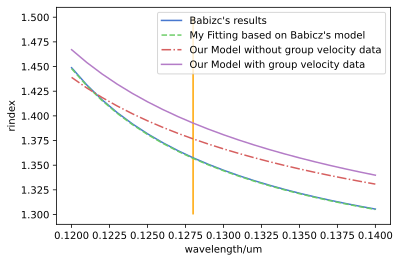

In [14]:
# compare 4 curves :
plt.style.use('seaborn-muted')

def babizcmodel(a0, aUV, aIR, x):
    A = a0 + aUV*x**2/(x**2-0.1066**2) + aIR*x**2/(x**2-0.9083**2)
    return np.sqrt(1+3*A/(3-A))

def zhoumodel(fa, fb, fc, l):
    A = 1.2055e-2*2/3.
    rho_ratio = 34.49/(44.66e-3)
    l1 = 91.012
    l2 = 89.892
    l3 = 214.02
    B = A*rho_ratio*(fa/(l1-1/l/l)+fb/(l2-1/l/l)+fc/(l3-1/l/l))
    return np.sqrt(3/(1-B)-2)

def lraymodel(x, n):
    #kT = 2.18E-9
    kT = 2.24442E-9
    kB = 1.380649E-23
    T = 90
    f = 1E22
    return 1/(8*np.pi**3/3/x**4 * ((n**2-1)*(n**2+2)/3)**2 *kB *kT *T *f)

babizc = []
babizc_chi2 = []
zhou = []
zhouGV = []

babizc_Lray = []
babizc_chi2_Lray = []
zhou_Lray = []
zhouGV_Lray = []

#print(zhoumodel(0.207, 0.0742, 4.2148, 0.128))

wavelength1 = [361.2, 365, 406.3, 435.8, 475.3, 508.6, 546.1, 578, 643.9]
rindex1 = [1.2326, 1.2331, 1.2308, 1.2297, 1.2285,  1.2277, 1.2269, 1.2264, 1.2256]
wavelength1 = np.array(wavelength1)/1000.

wavelength = np.arange(0.120, 0.140, 0.001)
for elem in wavelength:
    babizc.append(babizcmodel(0.335, 0.099, 0.008, elem))
    babizc_chi2.append(babizcmodel(0.335, 0.0987, 0.00803, elem))
    zhou.append(zhoumodel(0.207, 0.0742, 4.2148, elem))
    zhouGV.append(zhoumodel(0.3452, 0.0190, 4.0160, elem))

    babizc_Lray.append(lraymodel(elem, babizc[-1]))
    babizc_chi2_Lray.append(lraymodel(elem, babizc_chi2[-1]))
    zhou_Lray.append(lraymodel(elem, zhou[-1]))
    zhouGV_Lray.append(lraymodel(elem, zhouGV[-1]))

    if elem == 0.128:
        print(babizc_Lray[-1])
        print(babizc_chi2_Lray[-1])
        print(zhou_Lray[-1])
        print(zhouGV_Lray[-1])


plt.vlines(0.128, 1.3, 1.5, color='orange')
plt.plot(wavelength, babizc, "-", label="Babizc's results")
plt.plot(wavelength, babizc_chi2, '--', label="My Fitting based on Babicz's model")
plt.plot(wavelength, zhou, '-.',label="Our Model without group velocity data")
plt.plot(wavelength, zhouGV, '-',label="Our Model with group velocity data")
#plt.plot(wavelength1, rindex1, "o", ms=4, label="Sinnock's data")

#plt.plot(wavelength, babizc_Lray, "-", label="Babizc's results")
#plt.plot(wavelength, babizc_chi2_Lray, '--', label="My Fitting based on Babicz's model")
#plt.plot(wavelength, zhou_Lray, '-.',label="Our Model without group velocity data")
#plt.plot(wavelength, zhouGV_Lray, '-',label="Our Model with group velocity data")
#plt.vlines(0.128, 0, 200)

plt.legend()
plt.xlabel('wavelength/um')
plt.ylabel('rindex')

#plt.savefig('rindexcurvezoomin.pdf')


In [ ]:
# compare different parameters for zhou's model
def gasmodel(fa, fb, fc, l):
    A = 1.2055e-2*2/3.
    rho_ratio = 34.49/(44.66e-3)
    l1 = 91.012
    l2 = 89.892
    l3 = 214.02
    B = A*rho_ratio*(fa/(l1-1/l/l)+fb/(l2-1/l/l)+fc/(l3-1/l/l))
    return np.sqrt(3/(1-B)-2)

def lraymodel(x, n):
    #kT = 2.18E-9
    kT = 2.24442E-9
    kB = 1.380649E-23
    T = 90
    f = 1E22
    return 1/(8*np.pi**3/3/x**4 * ((n**2-1)*(n**2+2)/3)**2 *kB *kT *T *f)

gasapp = []




In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import uproot as up
import numpy as np

# Draw Transmission from 2012
wavelength = []
trans = []
trans_err = []
with open('./data2012.txt') as f:
    for lines in f.readlines():
        line = lines.strip('\n')
        data = line.split(' ')
        wavelength.append(float(data[0]))
        trans.append(float(data[1]))
        trans_err.append(float(data[2]))


from ROOT import TF1, TGraphErrors, TMath
func = TF1("func", "1-TMath::Exp(-[0]*(x-[1]))", 118, 150)
ge = TGraphErrors()
for idd, x, y, yerr in zip([i for i in range(len(wavelength))], wavelength, trans, trans_err):
    ge.SetPoint(idd, x, y)
    ge.SetPointError(idd, 0, yerr)
#ge.Fit(func, "RE")
#p0 = ge.GetParameter(0)
#p1 = ge.GetParameter(1)
#drawx = []; drawy = []
#for i in range(118, 150, 1):
#    drawx.append(i)
#    drawy.append(func.Eval(i))


#plt.errorbar(wavelength, trans, yerr=trans_err, fmt='o-', ms=1.2, lw=1, color='darkviolet', label='data')
#plt.plot(drawx, drawy, "-", lw=1.6, color='darkorange', label="fitting")
#plt.vlines(128, 0, 1.1, color='forestgreen')
#plt.ylim(0, 1.1)
#plt.xlabel('wavalength/nm')
#plt.ylabel('transmission')
#plt.legend()
